In [136]:
import soundfile as sf
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import medfilt

In [137]:
audio_file_path = '/home/vu/PycharmProjects/XLTHS/TinHieuHuanLuyen/studio_M2.wav'
audio_samples, sample_rate = sf.read(audio_file_path)

In [138]:
frame_size = int(0.020 * sample_rate)
hop_size = int(0.010 * sample_rate)

ste = []
zcr = []
for i in range(0, len(audio_samples) - frame_size, hop_size):
    frame = audio_samples[i:i + frame_size]
    ste.append(np.sum(frame ** 2))
    zcr.append(np.sum(np.abs(np.diff(np.sign(frame))) > 0) / (2 * frame_size))

In [139]:
voiced_unvoiced_segments = dict()
for i in range(len(ste)):
    if ste[i] > 0.02 and zcr[i] < 0.11:
        voiced_unvoiced_segments[i] = "green"
    else:
        voiced_unvoiced_segments[i] = "red"

In [140]:
color_to_value = {"red": 1, "green": 0}
data_as_numbers = list(map(lambda x: color_to_value[x],voiced_unvoiced_segments.values()))
temp_list = medfilt(data_as_numbers, kernel_size=5)
value_to_color = {1: "red", 0: "green"}
numbers_as_data = list(map(lambda x: value_to_color[x], temp_list))
voiced_unvoiced_segments.update(zip(voiced_unvoiced_segments.keys(), numbers_as_data))

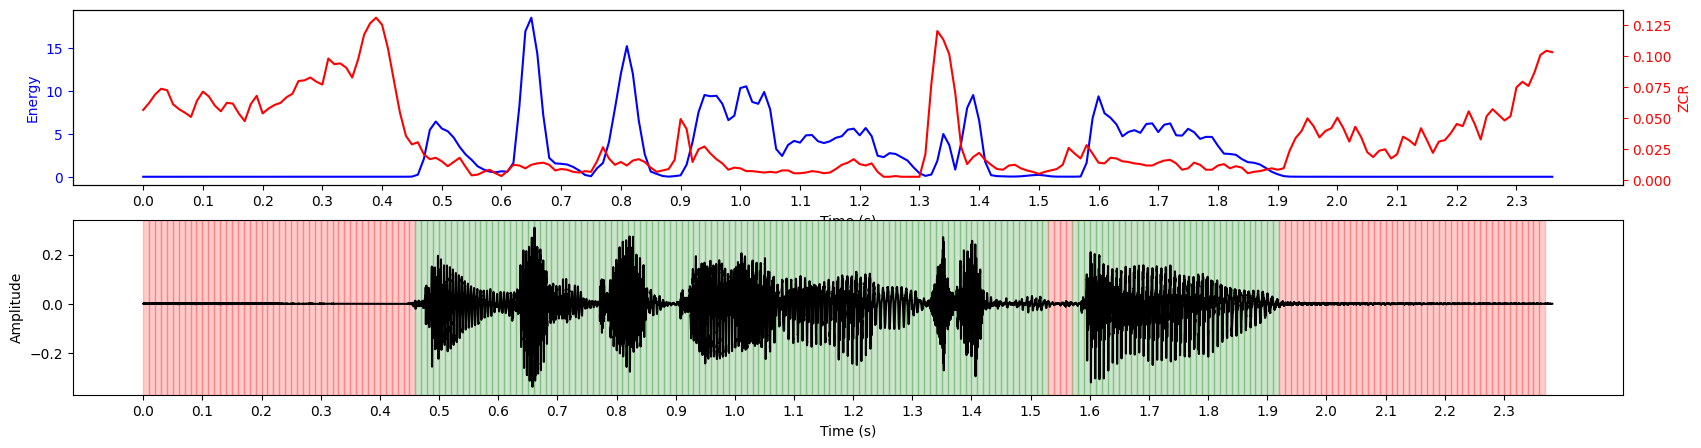

In [141]:
time = np.arange(len(ste)) * hop_size / sample_rate
fig, axs = plt.subplots(2, 1, figsize=(20, 5))
axs[0].plot(time, ste, 'b')
axs[0].set_xlabel('Time (s)')
axs[0].set_ylabel('Energy', color='b')
axs[0].tick_params('y', colors='b')

ax2 = axs[0].twinx()
ax2.plot(time, zcr, 'r')
ax2.set_ylabel('ZCR', color='r')
ax2.tick_params('y', colors='r')

plt.xticks(np.arange(0, len(ste) * hop_size / sample_rate, 0.1))

time = np.arange(len(audio_samples)) / sample_rate
axs[1].plot(time, audio_samples, color='black')
for frame_idx, color in voiced_unvoiced_segments.items():
    axs[1].axvspan(frame_idx * hop_size / sample_rate,
                   (frame_idx + 1) * hop_size / sample_rate,
                   alpha=0.2, color=color)

axs[1].set_xlabel('Time (s)')
axs[1].set_ylabel('Amplitude')
axs[1].set_xticks(np.arange(0, len(audio_samples) / sample_rate, 0.1))

plt.show()

In [30]:
import numpy as np

def segment_audio(ste, zcr, ste_threshold, zcr_threshold):
    voiced_unvoiced_segments = dict()
    current_segment_start = None
    for i in range(len(ste)):
        if ste[i] > ste_threshold and zcr[i] < zcr_threshold:
            voiced_unvoiced_segments[i] = "green"
            current_segment_start = None
        elif ste[i] <= ste_threshold and zcr[i] < zcr_threshold:

            voiced_unvoiced_segments[i] = "red"
            if current_segment_start is None:
                current_segment_start = i
            if (i - current_segment_start) >= 4:
                for j in range(current_segment_start, i + 1):
                    voiced_unvoiced_segments[j] = "blue"
                current_segment_start = None
        else:
            voiced_unvoiced_segments[i] = "red"
            current_segment_start = None
    return voiced_unvoiced_segments
a = np.array([2,2,2,2,2,25, 4, 6, 2, 1, 7, 6, 1, 10, 12])
b = np.array([2,2,2,2,2,21, 2, 3, 4, 5, 6, 7, 8, 9, 10])
print(segment_audio(a, b, 5, 5))

{0: 'blue', 1: 'blue', 2: 'blue', 3: 'blue', 4: 'blue', 5: 'red', 6: 'red', 7: 'green', 8: 'red', 9: 'red', 10: 'red', 11: 'red', 12: 'red', 13: 'red', 14: 'red'}


In [14]:
import numpy as np

def segment_audio(ste, zcr, ste_threshold, zcr_threshold):
    voiced_unvoiced_segments = dict()
    current_segment_start = None
    for i in range(len(ste)):
        if ste[i] > ste_threshold and zcr[i] < zcr_threshold:
            voiced_unvoiced_segments[i] = "green"
            current_segment_start = None
        elif ste[i] <= ste_threshold:
            if current_segment_start is None:
                current_segment_start = i
            elif i - current_segment_start >= 4: # 24 frames = 300ms
                for j in range(current_segment_start, i ):
                    voiced_unvoiced_segments[j] = "blue"
                current_segment_start = None
            else:
                for j in range(current_segment_start, i + 1):
                    voiced_unvoiced_segments[j] = "red"
        else:
            voiced_unvoiced_segments[i] = "red"
            current_segment_start = None
    return voiced_unvoiced_segments
a = np.array([2,2,2,2,2,25, 4, 6, 2, 1, 7, 6, 1, 10, 12])
b = np.array([2,2,2,2,2,21, 2, 3, 4, 5, 6, 7, 8, 9, 10])
print(segment_audio(a, b, 5, 5))

{0: 'blue', 1: 'blue', 2: 'blue', 3: 'blue', 5: 'red', 7: 'green', 8: 'red', 9: 'red', 10: 'red', 11: 'red', 13: 'red', 14: 'red'}
